In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data1=pd.read_csv('vw_ChurnData.csv')

In [68]:
data1.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,NaN,Yes,No,Yes,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,NaN,Yes,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,Deal 5,Yes,No,Yes,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,Deal 4,Yes,No,Yes,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,NaN,Yes,No,Yes,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [70]:
data1.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status',
       'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [71]:
data1.isnull().sum()

Customer_ID                       0
Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Value_Deal                     3297
Phone_Service                     0
Multiple_Lines                    0
Internet_Service                  0
Internet_Type                  1223
Online_Security                   0
Online_Backup                     0
Device_Protection_Plan            0
Premium_Support                   0
Streaming_TV                      0
Streaming_Movies                  0
Streaming_Music                   0
Unlimited_Data                    0
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges       0
Total_Revenue               

In [72]:
data1.shape

(6007, 31)

In [73]:
data1=data1.drop(columns={'Customer_ID','Churn_Category','Churn_Reason'})

In [74]:
coloumns_to_encode=['Gender','Married','State','Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method']

In [75]:
# Encode categorical variables except the target variable
label_encoders={}
for coloumn in coloumns_to_encode:
    label_encoders[coloumn]=LabelEncoder()
    data1[coloumn]=label_encoders[coloumn].fit_transform(data1[coloumn])

In [76]:
# Removing the white space
data1['Customer_Status']=data1['Customer_Status'].str.strip()

In [77]:
# Manually encode the target variable 'Customer_Status'
data1['Customer_Status']=data1['Customer_Status'].map({'Stayed':0,'Churned':1})

In [78]:
# Split data into features and target
X=data1.drop(columns={'Customer_Status'})
y=data1['Customer_Status']

In [79]:
# Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
# Train Random forest model
# Initialize the Random forest classifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

# Train the model
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [81]:
# Make Predictions
y_pred=rf_model.predict(X_test)

In [82]:
# Evaluate the Model
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('\nClassification Report:')
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[787  54]
 [131 230]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       841
           1       0.81      0.64      0.71       361

    accuracy                           0.85      1202
   macro avg       0.83      0.79      0.80      1202
weighted avg       0.84      0.85      0.84      1202



In [83]:
# Feature selection using Feature Importances
importances=rf_model.feature_importances_
indices=np.argsort(importances)[::-1]

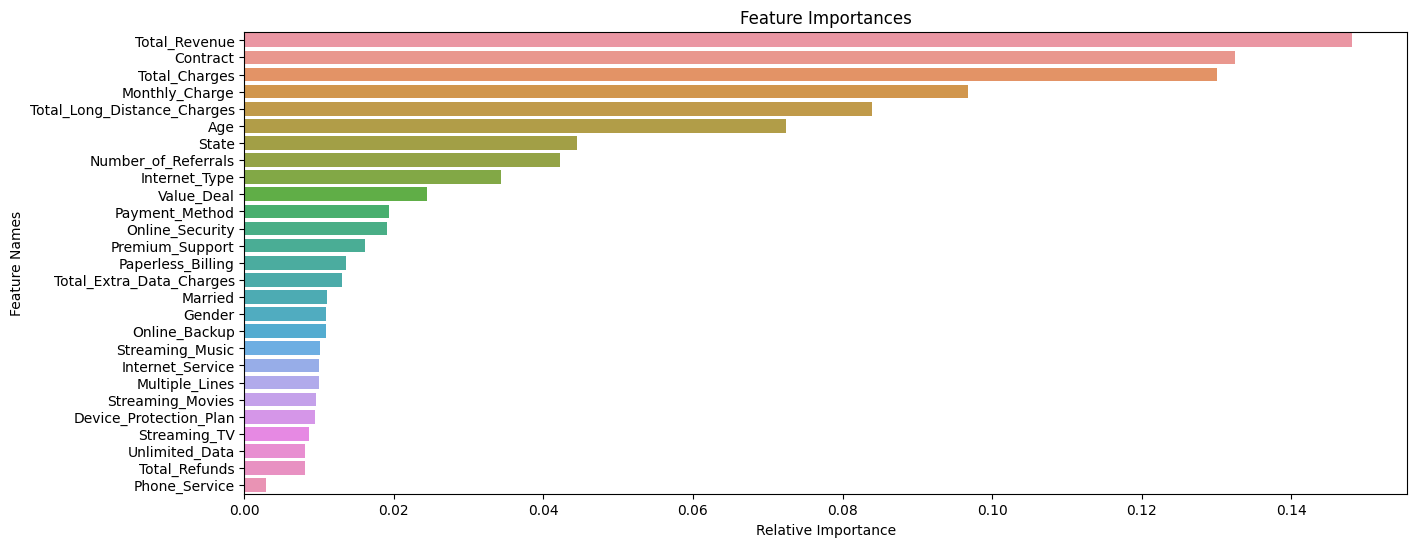

In [84]:
# Plot the feature importances
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [85]:
# Use Model for Prediction on New Data

In [86]:
new_data=pd.read_csv('vw_JoinData.csv')

In [87]:
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,Deal 5,Yes,Yes,Yes,...,Bank Withdrawal,72.10,72.1,0.0,0,7.77,79.87,Joined,Others,Others
1,57256-BIH,Female,18,No,Bihar,9,NaN,Yes,No,No,...,Credit Card,19.85,57.2,0.0,0,9.36,66.56,Joined,Others,Others
2,72357-MAD,Female,53,No,Madhya Pradesh,14,Deal 5,Yes,No,Yes,...,Credit Card,44.30,44.3,0.0,0,42.95,87.25,Joined,Others,Others
3,66612-KAR,Female,58,Yes,Karnataka,11,NaN,Yes,No,No,...,Credit Card,19.95,58.0,0.0,0,8.07,66.07,Joined,Others,Others
4,22119-WES,Male,31,Yes,West Bengal,5,NaN,Yes,No,No,...,Credit Card,20.05,33.7,0.0,0,3.62,37.32,Joined,Others,Others


In [88]:
# Retain the original DataFrame to preserve unencoded columns
original_data=new_data.copy()

In [89]:
# Retain the customerid column
customers_id=new_data['Customer_ID']

In [90]:
# Drop columns that won't be used for prediction
new_data=new_data.drop(columns={'Customer_ID','Customer_Status','Churn_Category','Churn_Reason'})

In [91]:
# Encode categorical variables using the saved label encoders
for coloumn in new_data.select_dtypes(include=['object']).columns:
    new_data[coloumn]=label_encoders[coloumn].transform(new_data[coloumn])

In [92]:
# Make predictions
new_predictions=rf_model.predict(new_data)

In [93]:
# Add predictions to original datafarme
original_data['Customer_Status_Predicted']=new_predictions

In [94]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data=original_data[original_data['Customer_Status_Predicted']==1]

In [97]:
# Save the result
original_data.to_csv('predictions.csv')